### Import

In [2]:
import numpy as np
import functions_eq_mag as fc
import functions_fatiando as ft
import fourier_continuation as fc_c
from timeit import default_timer as time
from scipy.interpolate import griddata
from scipy import interpolate, signal
import pickle as pickle
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

### Observed Grid and Decimated Data

In [3]:
# This data was gridded with dimensions 10000 x 131
with open('carajas_decimated_tf.pickle', 'rb') as r:
    carajas = pickle.load(r)

In [4]:
xi = carajas['x']
yi = carajas['y']
zi = carajas['z']
dobs_dec = carajas['tf']
shape_m = (10000, 131)
N = shape_m[0]*shape_m[1]
xi_plot = carajas['x']/1000
yi_plot = carajas['y']/1000

### Decimated results

In [5]:
# This data was gridded with dimensions 10000 x 131
with open('carajas_decimated_processing.pickle', 'rb') as r:
    carajas_decimated_processing = pickle.load(r)

### Interpolated results

In [6]:
# This data was gridded with dimensions 10000 x 131
with open('carajas_grid_line_processing.pickle', 'rb') as r:
    carajas_grid_line_processing = pickle.load(r)

### Figure 8 Plot

In [7]:
itmax = carajas_decimated_processing['itmax']
res_list_ls = carajas_decimated_processing['res_list_ls']

In [8]:
res_list_ls = np.array(res_list_ls)
res_list_ls = res_list_ls/N

In [9]:
scale_max = np.max(carajas_grid_line_processing['delta_tf_bccb'])
scale_min = np.min(carajas_grid_line_processing['delta_tf_bccb'])
print (scale_min, scale_max)
#scale_max = 28.
#scale_min = -33.

-267.3737999080157 305.77728389317826


In [10]:
itmax

array([  30,   40,   50,   60,   70,  150,  200,  300,  400,  500, 1000,
       2000])

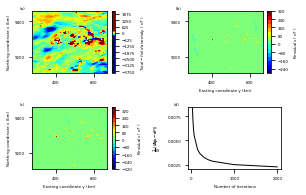

In [16]:
# plot of the total field anomaly at z=900 
height= 13.
width = 20.
height_per_width = height/width
fig = plt.figure(figsize=(4.33,4.33*height_per_width))
fig.patch.set_facecolor('xkcd:white')
plt.subplot(221)
plt.title('(a)', y=0.93, x=-0.125, fontsize=4)
plt.tricontourf(yi_plot, xi_plot, dobs_dec, 300, vmin=-300, vmax=300, cmap='jet')
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
cb.set_label('$Total-field \,\, anomaly$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(222)
plt.title('(b)', y=0.93, x=-0.125, fontsize=4)
plt.tricontourf(yi_plot, xi_plot, carajas_grid_line_processing['delta_tf_bccb'], 15, vmin=scale_min, vmax=scale_max, cmap='jet')
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(223)
plt.title('(c)', y=0.93, x=-0.125, fontsize=4)
plt.tricontourf(yi_plot, xi_plot, carajas_decimated_processing['delta_tf_bccb'], 15, vmin=scale_min, vmax=scale_max, cmap='jet')
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(224)
plt.title('(d)', y=0.93, x=-0.125, fontsize=4)
plt.plot(itmax,res_list_ls, 'k-', linewidth=1)
plt.ylim(np.min(res_list_ls)-0.0002,np.max(res_list_ls)+0.0001)
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Number of iterations', fontsize=4)
plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=4)

plt.tight_layout()
#plt.savefig('figures/Figure 8.png', dpi=1200)

### Figure 9 Plot

In [17]:
scale_max = np.max(carajas_decimated_processing['tf_bccb_up'])
scale_min = np.min(carajas_decimated_processing['tf_bccb_up'])
print (scale_min, scale_max)
#scale_max = 28.
#scale_min = -33.

-513.8532460513086 256.23666762091796


In [18]:
scale_max = np.max(carajas_decimated_processing['tf_fourier_up'])
scale_min = np.min(carajas_decimated_processing['tf_fourier_up'])
print (scale_min, scale_max)

-618.7776373473399 266.9635446867512


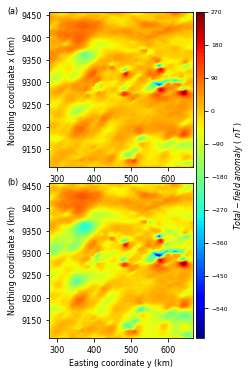

In [69]:
# plot of the total field anomaly at z=900 
height=17.
width = 10.
height_per_width = height/width
fig = plt.figure(figsize=(3.33,3.33*height_per_width))
fig.patch.set_facecolor('xkcd:white')

ax1 = fig.add_subplot(211)
plt.title('(a)', y=0.95, x=-0.25, fontsize=8)
mesh = ax1.tricontourf(yi_plot, xi_plot, carajas_decimated_processing['tf_bccb_up'], 100, 
                       vmin=scale_min, vmax=scale_max, cmap='jet')
#cb = plt.colorbar()
#cb.set_label('$tf$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=8)

ax2 = fig.add_subplot(212)
plt.title('(b)', y=0.95, x=-0.25, fontsize=8)
mesh = ax2.tricontourf(yi_plot, xi_plot, carajas_decimated_processing['tf_fourier_up'], 100, 
                       vmin=scale_min, vmax=scale_max, cmap='jet')
#cb = plt.colorbar()
#cb.set_label('$tf$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Easting coordinate y (km)', fontsize=8)
plt.ylabel('Northing coordinate x (km)', fontsize=8)

cb_ax = fig.add_axes([0.815, 0.1, 0.032, 0.8])
cbar = fig.colorbar(mesh, cax=cb_ax)
cbar.ax.tick_params(labelsize=6)
cbar.set_label('$Total-field \,\, anomaly$ ( $nT$ )', rotation=90, fontsize=8)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.2, right=0.8,
                    wspace=0.4, hspace=0.1)
#plt.tight_layout()

#plt.savefig('figures/Figure 9.png', dpi=1200)